In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt 

%matplotlib inline 

top_2010_2019 = pd.read_csv('2010-2019.csv', encoding='mbcs', index_col=0)

In [3]:
top_2010_2019.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
# Group dancability by year
year_groups = top_2010_2019.groupby('year').agg([np.mean, np.median, np.max, np.min])

danceability = year_groups['dnce'].reset_index()
danceability

,year,mean,median,amax,amin
0,2010,64.529412,67.0,83,23
1,2011,63.641509,65.0,82,30
2,2012,65.714286,67.0,86,38
3,2013,62.042254,63.0,85,28
4,2014,62.534483,63.5,96,29
5,2015,63.663158,67.0,90,26
6,2016,63.325000,63.0,93,0
7,2017,65.369231,68.0,93,27
8,2018,67.203125,67.5,97,26
9,2019,69.709677,70.0,90,48


In [25]:
years_locations = np.arange(danceability.shape[0])

avg = danceability['mean']
means = avg.to_numpy()

In [26]:
years_locations

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
means

array([64.52941176, 63.64150943, 65.71428571, 62.04225352, 62.53448276,
       63.66315789, 63.325     , 65.36923077, 67.203125  , 69.70967742])

In [30]:
slope, intercept = np.polyfit(years_locations, means, 1)
print(f"y = {slope}x + {intercept}")

y = 0.453365695161008x + 62.73306779937783


Text(0, 0.5, 'Average Danceability')

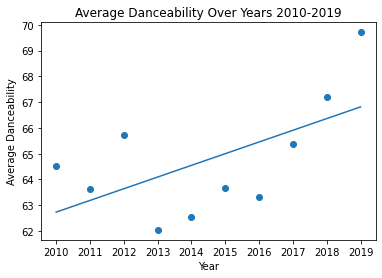

In [35]:
plt.scatter(years_locations, means)
plt.plot(years_locations, slope*years_locations+intercept)
plt.xticks(years_locations, danceability['year'].values)
plt.title("Average Danceability Over Years 2010-2019")
plt.xlabel("Year")
plt.ylabel("Average Danceability")